<a href="https://colab.research.google.com/github/abhi1628/ML_Exp_Using_Python/blob/main/4th_SEM_ML_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exp 1**

### How to calculate important numbers based on data sets, how to use various Python modules and how to make functions that are able to predict the outcome based on what we have learned (Small Dataset)


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Creating a small dataset
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Math': [85, 78, 92, 70, 88],
    'Science': [90, 82, 85, 78, 91]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Descriptive statistics
mean_math = df['Math'].mean()
median_math = df['Math'].median()
std_dev_math = df['Math'].std()

mean_science = df['Science'].mean()
median_science = df['Science'].median()
std_dev_science = df['Science'].std()

print(f"\nMath - Mean: {mean_math}, Median: {median_math}, Standard Deviation: {std_dev_math}")
print(f"Science - Mean: {mean_science}, Median: {median_science}, Standard Deviation: {std_dev_science}")

# Correlation between Math and Science scores
correlation = np.corrcoef(df['Math'], df['Science'])[0, 1]
print(f"\nCorrelation between Math and Science scores: {correlation}")

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Math'], df['Science'])
print(f"\nRegression line: Science = {slope:.2f} * Math + {intercept:.2f}")

def predict_science_score(math_score):
    return slope * math_score + intercept

# Predicting Science score for a new Math score
new_math_score = 95
predicted_science_score = predict_science_score(new_math_score)
print(f"\nPredicted Science score for Math score of {new_math_score}: {predicted_science_score:.2f}")


Dataset:
   Student  Math  Science
0    Alice    85       90
1      Bob    78       82
2  Charlie    92       85
3    David    70       78
4      Eva    88       91

Math - Mean: 82.6, Median: 85.0, Standard Deviation: 8.706319543871567
Science - Mean: 85.2, Median: 85.0, Standard Deviation: 5.449770637375485

Correlation between Math and Science scores: 0.7713797929686775

Regression line: Science = 0.48 * Math + 45.32

Predicted Science score for Math score of 95: 91.19


## **Exp 2**

### How can we get Big Data Sets, Learn: Data Distribution, Normal data distribution, Random Data Distribution, Scatter Plot

First 5 rows of the dataset:
   Normal_Distribution  Random_Distribution   Feature1  Feature2
0            54.967142            32.125517  17.602703  0.156382
1            48.617357            10.301919  14.859661  1.626021
2            56.476885             7.180755  22.510009  0.367508
3            65.230299             9.427598  11.465687  1.476648
4            47.658466            58.286936  18.660803  1.042893

Descriptive Statistics:
       Normal_Distribution  Random_Distribution      Feature1      Feature2
count         10000.000000         10000.000000  10000.000000  10000.000000
mean             49.978640            50.713457     19.978869      1.000028
std              10.034624            28.950584      4.955047      1.008747
min              10.775997             0.004812      0.718123      0.000017
25%              43.274095            25.754213     16.547761      0.283447
50%              49.974050            51.126931     19.988387      0.681392
75%              56.7108

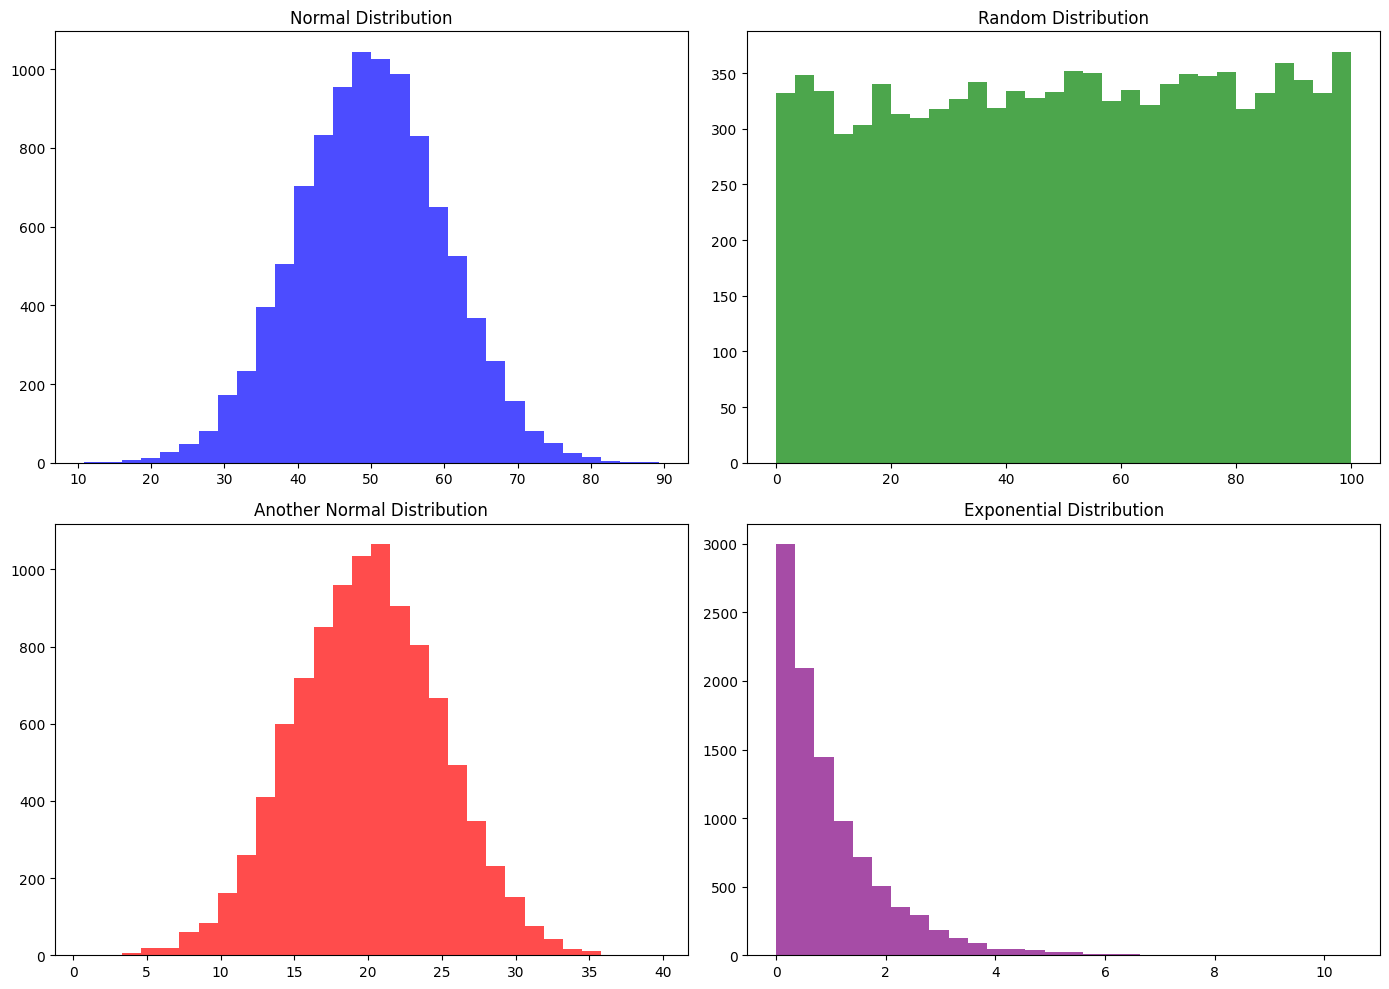

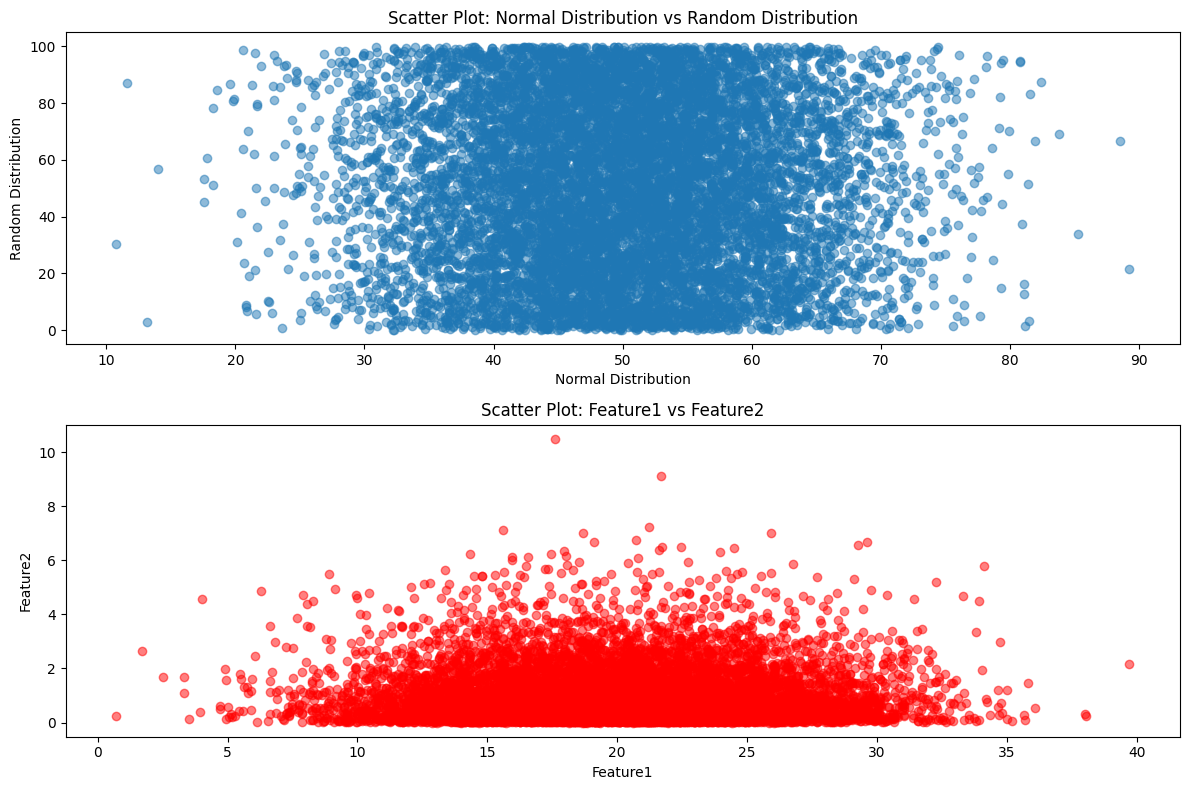

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 10000

# Generating data
data = {
    'Normal_Distribution': np.random.normal(loc=50, scale=10, size=num_samples),  # mean=50, std=10
    'Random_Distribution': np.random.rand(num_samples) * 100,  # Uniform distribution between 0 and 100
    'Feature1': np.random.normal(loc=20, scale=5, size=num_samples),  # Another normal distribution
    'Feature2': np.random.exponential(scale=1.0, size=num_samples),  # Exponential distribution
}

df = pd.DataFrame(data)
print("First 5 rows of the dataset:")
print(df.head())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Plot histograms to visualize distributions
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Normal_Distribution'], bins=30, color='blue', alpha=0.7)
plt.title('Normal Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['Random_Distribution'], bins=30, color='green', alpha=0.7)
plt.title('Random Distribution')

plt.subplot(2, 2, 3)
plt.hist(df['Feature1'], bins=30, color='red', alpha=0.7)
plt.title('Another Normal Distribution')

plt.subplot(2, 2, 4)
plt.hist(df['Feature2'], bins=30, color='purple', alpha=0.7)
plt.title('Exponential Distribution')

plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot between Normal_Distribution and Random_Distribution
plt.subplot(2, 1, 1)
plt.scatter(df['Normal_Distribution'], df['Random_Distribution'], alpha=0.5)
plt.title('Scatter Plot: Normal Distribution vs Random Distribution')
plt.xlabel('Normal Distribution')
plt.ylabel('Random Distribution')

# Scatter plot between Feature1 and Feature2
plt.subplot(2, 1, 2)
plt.scatter(df['Feature1'], df['Feature2'], alpha=0.5, color='red')
plt.title('Scatter Plot: Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()


## **Exp 3**

### Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets

In [4]:
import tensorflow as tf
import numpy as np

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10000, verbose=0)  # Train for 10000 epochs

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Test the model
predictions = model.predict(X)
print("\nPredictions:")
print(predictions)


1/1 [==============================] - 0s 147ms/step - loss: 0.0156 - accuracy: 1.0000
Loss: 0.015568401664495468, Accuracy: 1.0
1/1 [==============================] - 0s 82ms/step

Predictions:
[[0.01616075]
 [0.9853536 ]
 [0.98345524]
 [0.01443771]]


## **Exp 4**

### The probability that it is Friday and that a student is absent is 3%. Since there are 5 working days, the probability that it is Friday is 20%. What is the probability that the student is absent given that the day is Friday? Apply Baye's theorem.

In [2]:
prob_absent_on_friday = 0.03
prob_day_is_friday = 0.2
bayes_result = (prob_absent_on_friday/prob_day_is_friday)
print(bayes_result*100)

15.0


## **Exp 5**

### Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set.

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


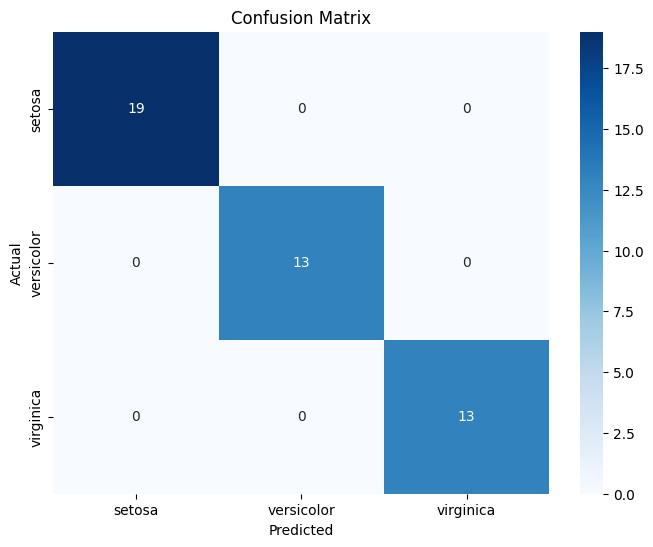

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# For reproducibility
np.random.seed(42)

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **Exp 6**

### Implement and demonstrate simple Linear Regression Algorithm based on a given set of training data samples. Read the training data from a .CSV file

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Create a sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [1.1, 2.0, 2.9, 3.8, 4.7, 5.6, 6.5, 7.4, 8.3, 9.2],
    'Target': [1.2, 2.1, 2.8, 3.7, 4.6, 5.7, 6.4, 7.3, 8.1, 9.0]
}

# Step 2: Convert the data to a DataFrame
df = pd.DataFrame(data)

# Step 3: Write the DataFrame to a CSV file
df.to_csv("linear_regression_data.csv", index=False)

# Step 4: Load the training dataset from the CSV file
training_data = pd.read_csv("linear_regression_data.csv")

# Step 5: Preprocess the data if necessary (here, no preprocessing is needed)

# Split the dataset into features (X) and the target variable (y)
X = training_data.drop('Target', axis=1)
y = training_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Linear Regression model using the training data
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Step 7: Evaluate the model using the test dataset
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optional: Print the model's coefficients and intercept
print("Coefficients:", linear_regression_model.coef_)
print("Intercept:", linear_regression_model.intercept_)

# Optional: Print predictions and actual values for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)


Mean Squared Error: 0.0057167806183114015
Coefficients: [0.48533054 0.43679749]
Intercept: 0.16867498571156503
   Actual  Predicted
8     8.1   8.162069
1     2.1   2.012931


## **Exp 7**

### Implement and demonstrate Logistic Regression (Binomial) based on a given set of training data samples. Read the training data from a .CSV file.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Create a sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
    'Feature3': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A'],
    'class': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]  # Binary class labels (0 or 1)
}

# Step 2: Convert the data to a DataFrame
df = pd.DataFrame(data)

# Step 3: Write the DataFrame to a CSV file
df.to_csv("logistic_regression_data.csv", index=False)

# Step 4: Load the training dataset from the CSV file
training_data = pd.read_csv("logistic_regression_data.csv")

# Step 5: Preprocess the data if necessary (encoding categorical features)
training_data['Feature3'] = training_data['Feature3'].map({'A': 0, 'B': 1})

# Split the dataset into features (X) and the target variable (y)
X = training_data.drop('class', axis=1)
y = training_data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Logistic Regression model using the training data
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Step 7: Evaluate the model using the test dataset
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Print the model's coefficients and intercept
print("Coefficients:", logistic_regression_model.coef_)
print("Intercept:", logistic_regression_model.intercept_)


Accuracy: 1.0
Coefficients: [[-0.15401922  0.16237438  1.33738313]]
Intercept: [-0.78362093]


## **Exp 8**

### Implement and demonstrate naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier,considering few test data sets.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': ['A', 'B', 'A', 'B', 'A'],
    'class': [0, 1, 0, 1, 0]  # Binary class labels (0 or 1)
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv("sample_data.csv", index=False)

# Load the training dataset from CSV file
training_data = pd.read_csv("sample_data.csv")

# Encode the categorical feature
label_encoder = LabelEncoder()
training_data['Feature2'] = label_encoder.fit_transform(training_data['Feature2'])

# Split the dataset into features (X) and the target variable (y)
X_train = training_data.drop('class', axis=1)
y_train = training_data['class']

# Train a naive Bayesian classifier using the training data
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Create a sample test dataset
test_data = {
    'Feature1': [2, 3, 4],
    'Feature2': ['B', 'A', 'B'],
    'class': [1, 0, 1]  # Actual class labels for evaluation
}

# Convert the test data to a DataFrame
test_df = pd.DataFrame(test_data)

# Encode the categorical feature in the test data
test_df['Feature2'] = label_encoder.transform(test_df['Feature2'])

# Use the trained classifier to predict the classes for the test data
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy of the classifier using the predicted classes and the actual classes
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


## **Exp 9**

### Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample

In [14]:
import numpy as np

class Node:
    def __init__(self, feature=None, value=None, label=None):
        self.feature = feature  # Index of feature to split on
        self.value = value  # Value of feature to split on
        self.label = label  # Majority label for leaf node
        self.children = {}  # Dictionary to hold child nodes

def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(data, labels, feature_index):
    # Calculate entropy of the entire dataset
    total_entropy = entropy(labels)

    # Calculate entropy after splitting on the given feature
    unique_values = np.unique(data[:, feature_index])
    weighted_entropy = 0
    for value in unique_values:
        subset_indices = np.where(data[:, feature_index] == value)[0]
        subset_labels = labels[subset_indices]
        subset_entropy = entropy(subset_labels)
        weighted_entropy += (len(subset_labels) / len(labels)) * subset_entropy

    # Calculate information gain
    info_gain = total_entropy - weighted_entropy
    return info_gain

def id3(data, labels, features):
    # Base cases
    if len(np.unique(labels)) == 1:  # If all labels are the same
        return Node(label=labels[0])
    if len(features) == 0:  # If no features left to split on
        return Node(label=np.argmax(np.bincount(labels)))

    # Choose the best feature to split on
    best_feature_index = np.argmax([information_gain(data, labels, i) for i in range(data.shape[1])])
    best_feature = features[best_feature_index]

    # Create a new node with the chosen feature
    root = Node(feature=best_feature)

    # Recursively create child nodes for each value of the chosen feature
    unique_values = np.unique(data[:, best_feature_index])
    for value in unique_values:
        subset_indices = np.where(data[:, best_feature_index] == value)[0]
        subset_data = data[subset_indices]
        subset_labels = labels[subset_indices]
        child = id3(subset_data, subset_labels, features[features != best_feature])
        root.children[value] = child

    return root

def predict(tree, sample):
    if tree.label is not None:  # Leaf node
        return tree.label
    else:
        value = sample[tree.feature]
        if value in tree.children:
            return predict(tree.children[value], sample)
        else:
            # Value not found in training data, return majority label
            return tree.label

# Example dataset
data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 1],
    [1, 1, 1]
])
labels = np.array([0, 0, 1, 1])
features = np.array([0, 1])

# Build the decision tree
tree = id3(data, labels, features)

# Classify a new sample
new_sample = np.array([0, 0])
prediction = predict(tree, new_sample)
print("Prediction for new sample:", prediction)


Prediction for new sample: 0


## **Exp 10**

### Given the following data, which specify classifications for nine combinations of VAR1 and VAR2 predict a classification for a case where VAR1=0.906 and VAR2=0.606, using the result of k-means clustering with 3 means (i.e., 3 centroids)

VAR1 VAR2 CLASS

1.713 1.586 0

0.180 1.786 1

0.353 1.240 1

0.940 1.566 0

1.486 0.759 1

1.266 1.106 0

1.540 0.419 1

0.459 1.799 1

0.773 0.186 1


In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import mode

# Define the dataset
data = {
    'VAR1': [1.713, 0.180, 0.353, 0.940, 1.486, 1.266, 1.540, 0.459, 0.773],
    'VAR2': [1.586, 1.786, 1.240, 1.566, 0.759, 1.106, 0.419, 1.799, 0.186],
    'CLASS': [0, 1, 1, 0, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
X = df[['VAR1', 'VAR2']].values
y = df['CLASS'].values

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['CLUSTER'] = kmeans.fit_predict(X)

print("Cluster assignment for each data point:")
print(df)

# New data point
new_point = np.array([[0.906, 0.606]])

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_point)
print(f"\nPredicted Cluster for the new data point: {predicted_cluster[0]}")

# Get all points in the predicted cluster
cluster_points = df[df['CLUSTER'] == predicted_cluster[0]]

# Determine the majority class in the predicted cluster
mode_result = mode(cluster_points['CLASS'])
predicted_class = mode_result.mode.item() if mode_result.count.size > 0 else None
print(f"\nPredicted Class for the new data point: {predicted_class}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster assignment for each data point:
    VAR1   VAR2  CLASS  CLUSTER
0  1.713  1.586      0        2
1  0.180  1.786      1        0
2  0.353  1.240      1        0
3  0.940  1.566      0        2
4  1.486  0.759      1        1
5  1.266  1.106      0        2
6  1.540  0.419      1        1
7  0.459  1.799      1        0
8  0.773  0.186      1        1

Predicted Cluster for the new data point: 1

Predicted Class for the new data point: 1
